In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../Data/processed/urldata-v2-noEquals.csv')


In [ ]:
features_for_correlation = df.select_dtypes(include='number')  

correlation_matrix_target = features_for_correlation.corr()


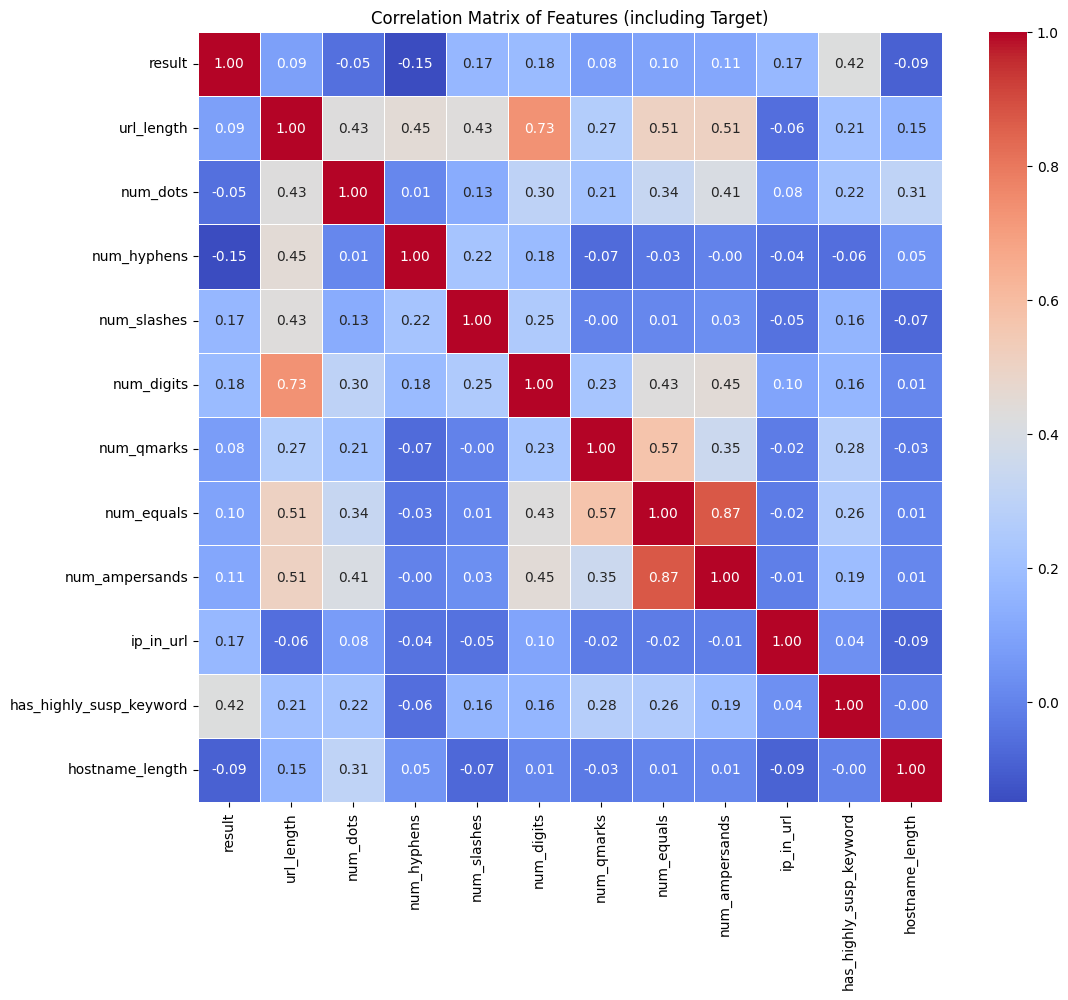

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


plt.title('Correlation Matrix of Features (including Target)')
plt.show()

In [9]:
df = df.drop('num_ampersands',axis=1)

In [ ]:
from urllib.parse import urlparse

def add_advanced_features(df):
    df_copy = df.copy()
    
    def calculate_entropy(text):
        try:
            if len(text) == 0:
                return 0
            char_counts = pd.Series(list(text.lower())).value_counts()
            probs = char_counts / len(text)
            entropy = -np.sum(probs * np.log2(probs))
            return entropy if not np.isnan(entropy) else 0
        except:
            return 0
    
    df_copy['url_entropy'] = df_copy['url'].apply(calculate_entropy)
    
    def extract_hostname(url):
        try:
            return urlparse(url).hostname or ''
        except:
            return ''
    
    df_copy['hostname'] = df_copy['url'].apply(extract_hostname)
    
    def safe_digit_ratio(text):
        try:
            if len(text) == 0:
                return 0
            return sum(c.isdigit() for c in text) / len(text)
        except:
            return 0

    df_copy['digit_ratio'] = df_copy['hostname'].apply(safe_digit_ratio)
    
    def safe_path_length(url):
        try:
            return len(urlparse(url).path)
        except:
            return 0
    
    df_copy['path_length'] = df_copy['url'].apply(safe_path_length)
    
    return df_copy

print("Adding advanced features...")
df_enhanced = add_advanced_features(df)
print(f"Enhanced dataset shape: {df_enhanced.shape}")

df_enhanced = df_enhanced.fillna(0)
print("Features added successfully!")


Adding advanced features...
Enhanced dataset shape: (450176, 18)
Features added successfully!


In [32]:
corr_feautures = df_enhanced.select_dtypes(include='number')  # or df[numeric_column_names] if you have a list

correlation_matrix_target = corr_feautures.corr()


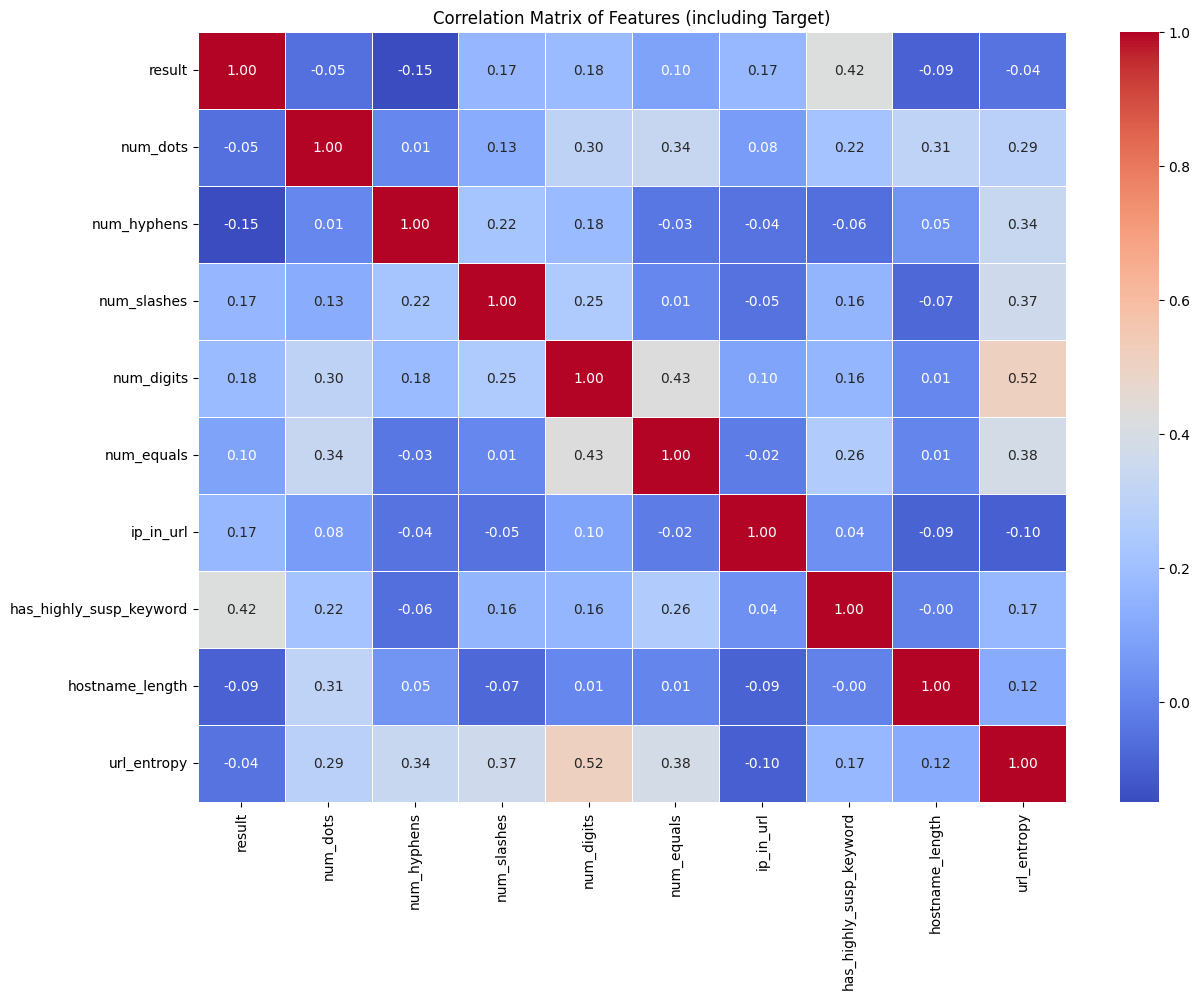

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Features (including Target)')
plt.show()

In [34]:
new_csv = "../Data/processed/urldata-v3-enhanced.csv"

try:
    df_enhanced.to_csv(new_csv, index=False)
    print(f"DataFrame successfully saved to '{new_csv}'")
except Exception as e:
    print(f"Error saving DataFrame to CSV: {e}")


DataFrame successfully saved to '../Data/processed/urldata-v3-enhanced.csv'


In [31]:
df_enhanced = df_enhanced.drop('path_length',axis=1)